In [1]:
from lib.data import *
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colormaps
import economic_complexity as ecplx
#from informe import SimuladorEstatico, SimuladorDinamico, SimuladorComplejo, PaisNaive
from informe import *
from lib.utils import correr_simulacion_mostrando, cantidad_descubrimientos_iteracion
import numpy as np

data, raw = get_default_oec_rca_raw_data()

Se cargaron los datos desde ../data/default_oce_2018-2020.pkl


In [2]:
rca = ecplx.rca(data)
M = build_M_from(rca)

In [10]:
lags = [1, 5, 10, 20, 50, 100]
iteraciones = [ 100, 100, 100, 150, 300, 600 ]

historias_cigarras = []
historias_hormigas = []
for lag, it in zip( lags, iteraciones):
    cigarras = SimuladorComplejo(lambda step: step > it , PaisCigarra, M.copy(deep=True), 0.55, lag)
    hormigas = SimuladorComplejo(lambda step: step > it , PaisHormiga, M.copy(deep=True), 0.55, lag)

    historias_cigarras.append( correr_simulacion_mostrando(cigarras, False) )
    historias_hormigas.append( correr_simulacion_mostrando(hormigas, False) )

proximidad calculada en: 0.1161661148071289
paises creados en: 0.003556489944458008
proximidad calculada en: 0.09978270530700684
paises creados en: 0.005005836486816406
empezando simulación: 2024-06-30 18:26:53
empezando simulación: 2024-06-30 18:30:53
proximidad calculada en: 0.5080718994140625
paises creados en: 0.1587824821472168
proximidad calculada en: 0.41152310371398926
paises creados en: 0.059336185455322266
empezando simulación: 2024-06-30 18:35:27
empezando simulación: 2024-06-30 18:37:23
proximidad calculada en: 0.09138298034667969
paises creados en: 0.0
proximidad calculada en: 0.09464359283447266
paises creados en: 0.003087282180786133
empezando simulación: 2024-06-30 18:38:19
empezando simulación: 2024-06-30 18:39:17
proximidad calculada en: 0.08855319023132324
paises creados en: 0.0
proximidad calculada en: 0.10061502456665039
paises creados en: 0.00489044189453125
empezando simulación: 2024-06-30 18:40:11
empezando simulación: 2024-06-30 18:41:51
proximidad calculada en

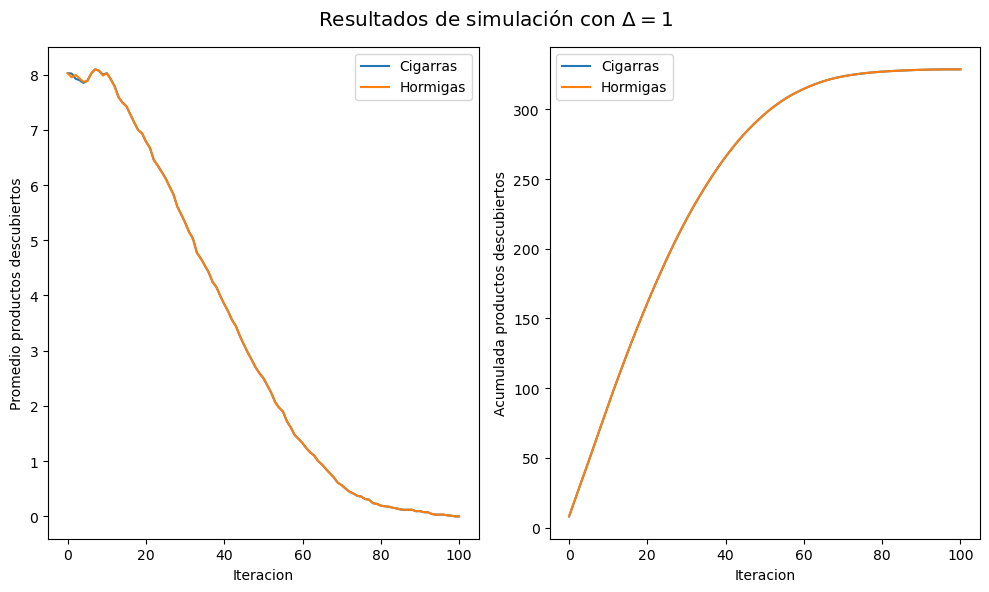

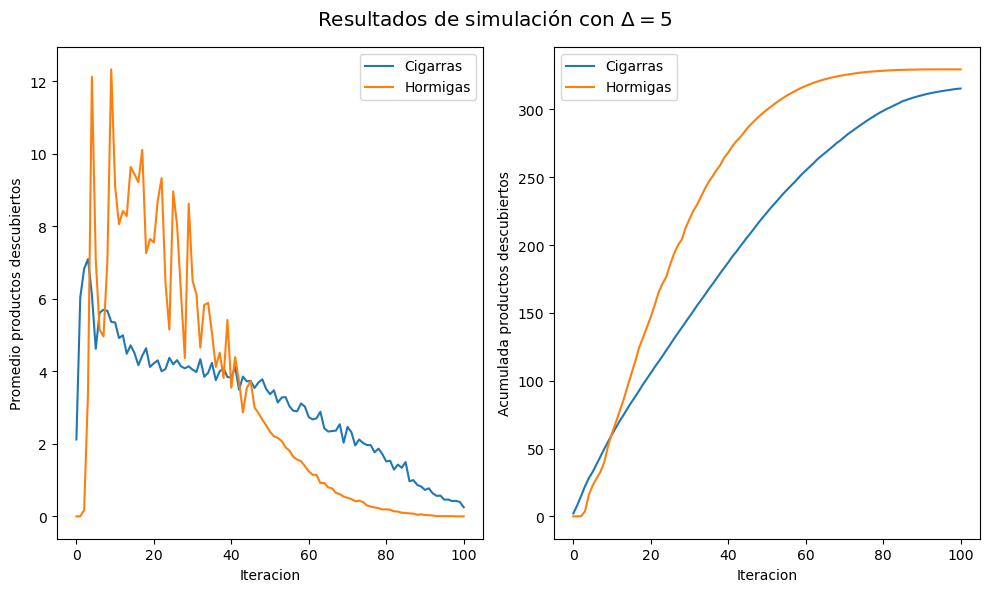

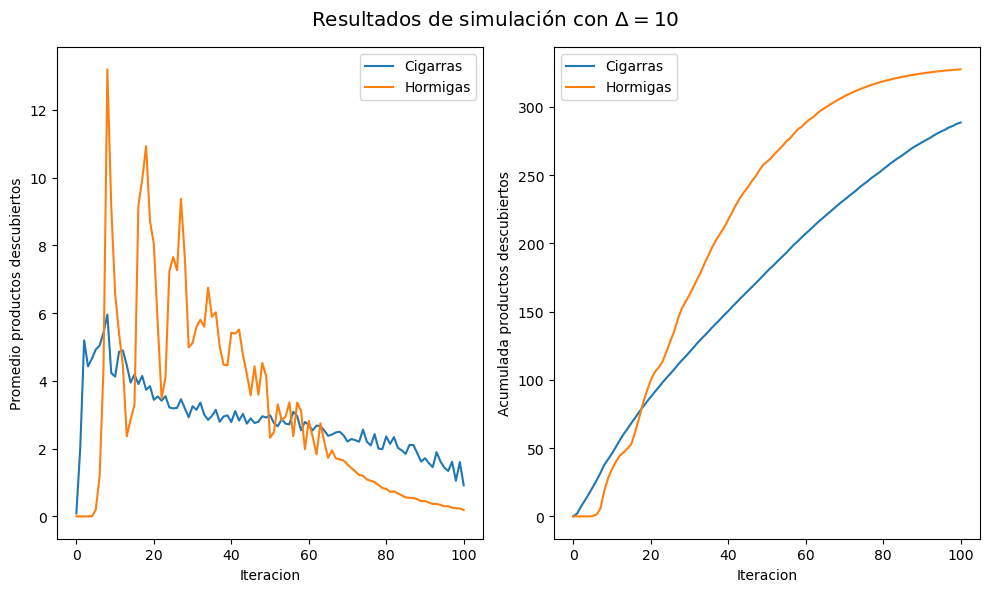

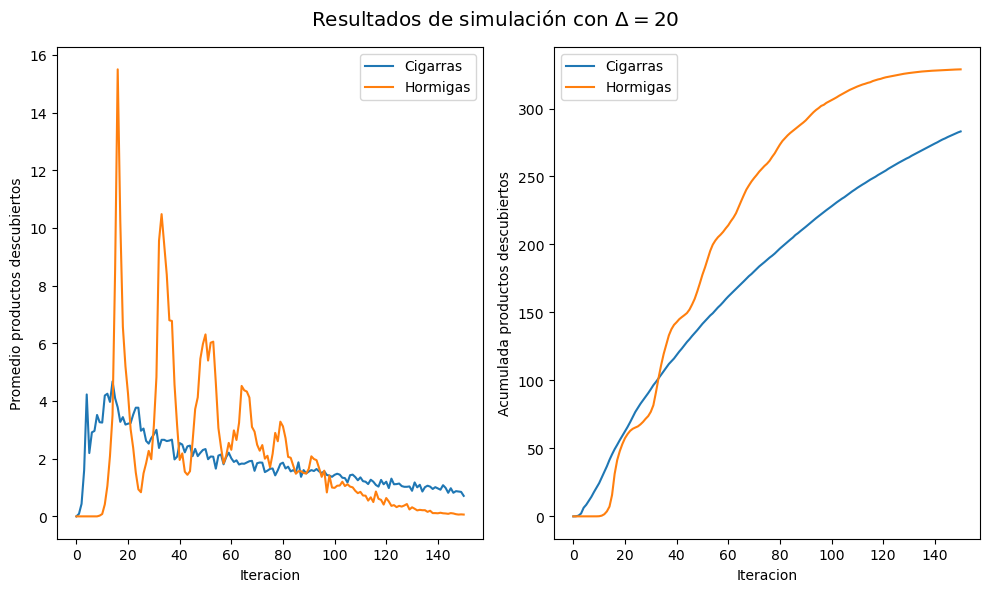

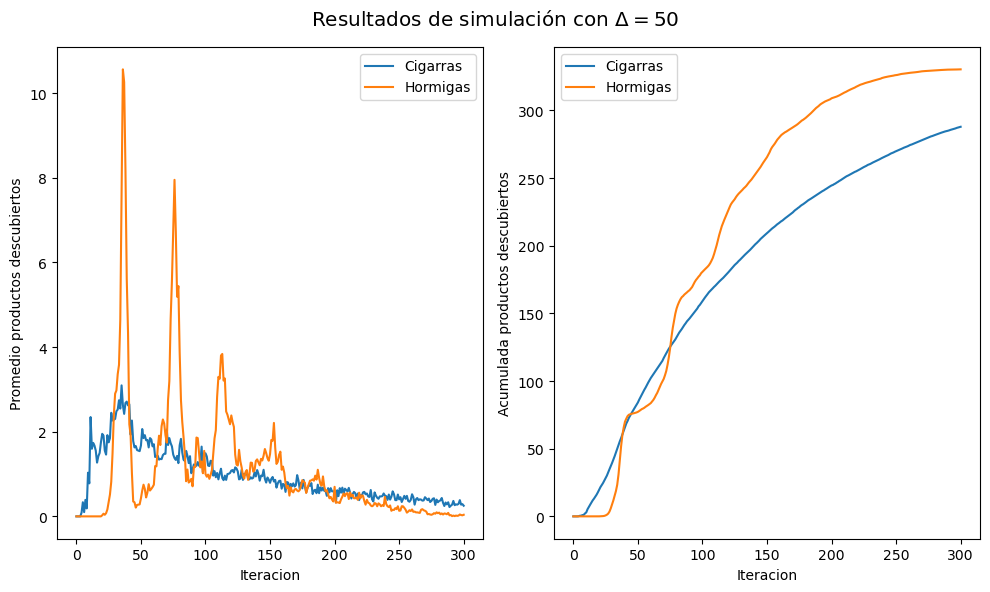

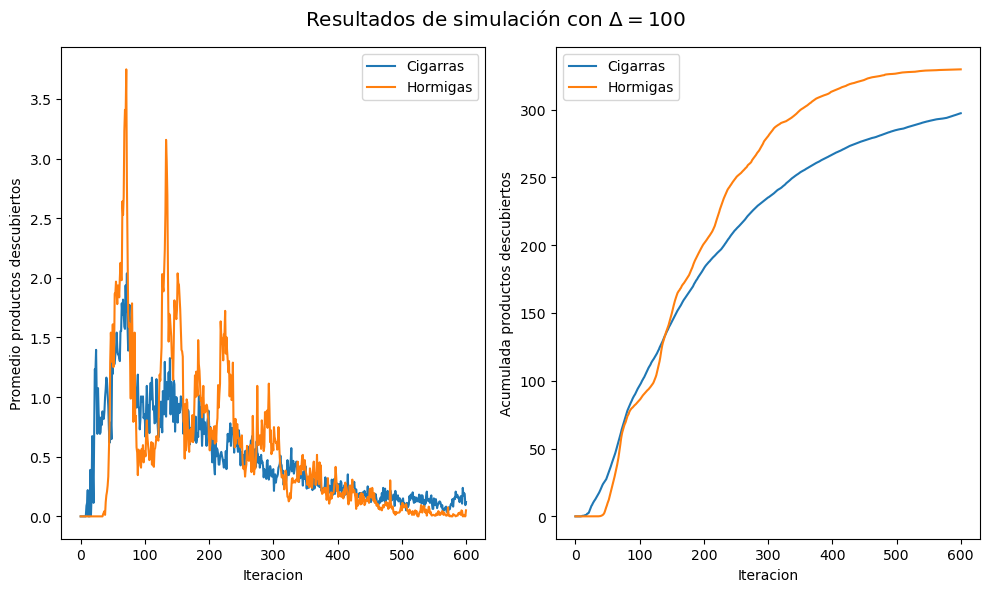

In [11]:
cant_paises = len(M.index.to_list())

for lag, historia_cigarra, historia_hormiga in zip(lags, historias_cigarras, historias_hormigas):
    fig = plt.figure(figsize=(10, 6))
    fig.suptitle(r"Resultados de simulación con $\Delta = %s $" %(str(lag)) , fontsize="x-large")

    plt.subplot(1,2,1)
    plt.plot(range(len(historia_cigarra)), cantidad_descubrimientos_iteracion(historia_cigarra) / cant_paises, label='Cigarras')
    plt.plot(range(len(historia_hormiga)), cantidad_descubrimientos_iteracion(historia_hormiga) / cant_paises, label='Hormigas')
    plt.xlabel('Iteracion')
    plt.ylabel('Promedio productos descubiertos')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(range(len(historia_cigarra)), np.cumsum( cantidad_descubrimientos_iteracion(historia_cigarra) / cant_paises ) , label='Cigarras')
    plt.plot(range(len(historia_hormiga)), np.cumsum( cantidad_descubrimientos_iteracion(historia_hormiga) / cant_paises ) , label='Hormigas')
    plt.xlabel('Iteracion')
    plt.ylabel('Acumulada productos descubiertos')
    plt.legend()

    plt.tight_layout()
    plt.show()